In [ ]:
import pandas as pd
import numpy as np
import requests
from lxml import html
from bs4 import BeautifulSoup
import requests
import time
from tqdm import tqdm
from datetime import datetime
#import prince
import matplotlib.pyplot as plt
from unidecode import unidecode
import warnings
import os
import sys

sys.path.append(os.getcwd().replace("notebooks","") + "src")

import functions as func
#import models as models
import eda as eda
import spider
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

In [ ]:
df = pd.read_parquet("/workspaces/cars/data/df_refine_20240916.parquet")
df.shape

In [ ]:
eda.summary_numeric(df["precio"])

In [4]:
#df.to_parquet("/workspaces/cars/data/df_refine_20240915.parquet")

In [ ]:
df["dtm_etl"].value_counts()

In [ ]:
pd.options.display.max_rows = 20
for col in df.columns:
    print(col)
    print(df[col].unique())
    print("-"*120)

## EDA

In [ ]:
df["marca_modelo"].value_counts().head(50)

In [ ]:
eda.Plot.hist(df["precio"])

In [9]:
vars_numeric = list(set(func.detect_numeric(df)) - set(["estado", "con_camara_de_reversa", "ultimo_digito_de_la_placa"]))
vars_cat = list(set(df.columns.tolist()) - set(vars_numeric + ["estado", "fecha", "nombre", "url", "version"]))

In [ ]:
vars_numeric

precio


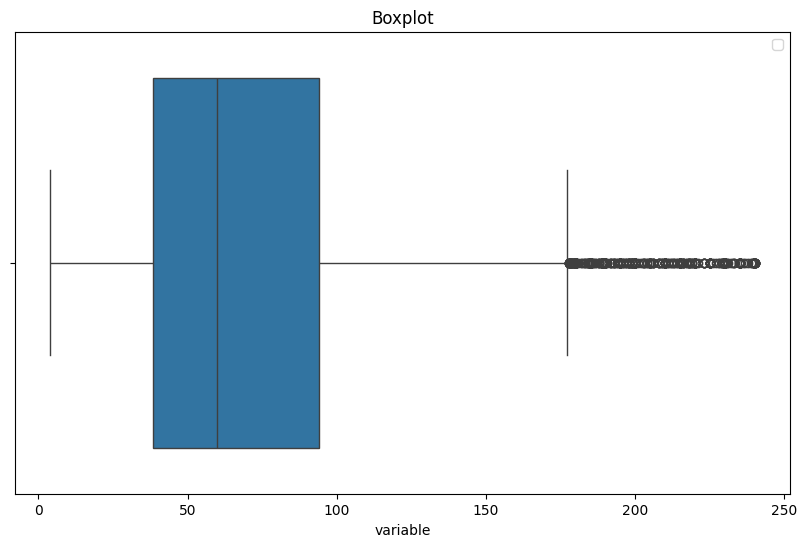

min: 3.9 | max: 240.0 | mean: 73.07113143 | median: 59.9 | sd: 46.9528 | cv: 64.25999999999999 %
año


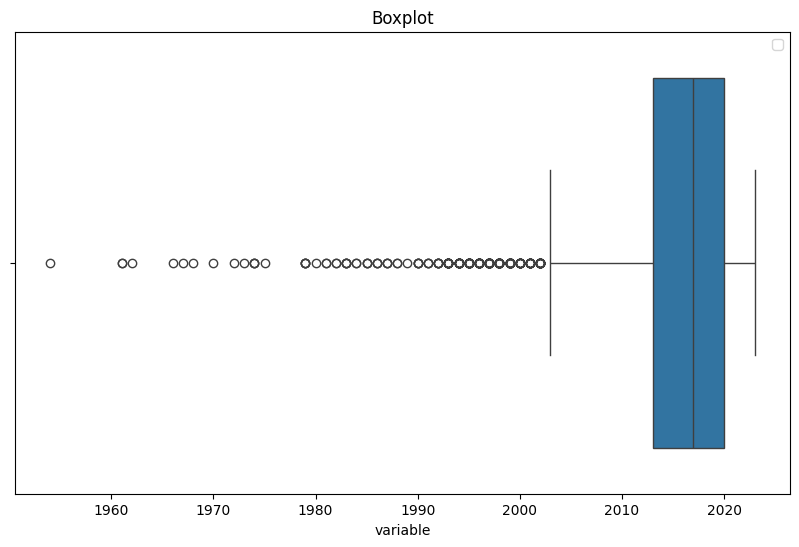

min: 1954.0 | max: 2023.0 | mean: 2015.89799809 | median: 2017.0 | sd: 6.1799 | cv: 0.31 %
km


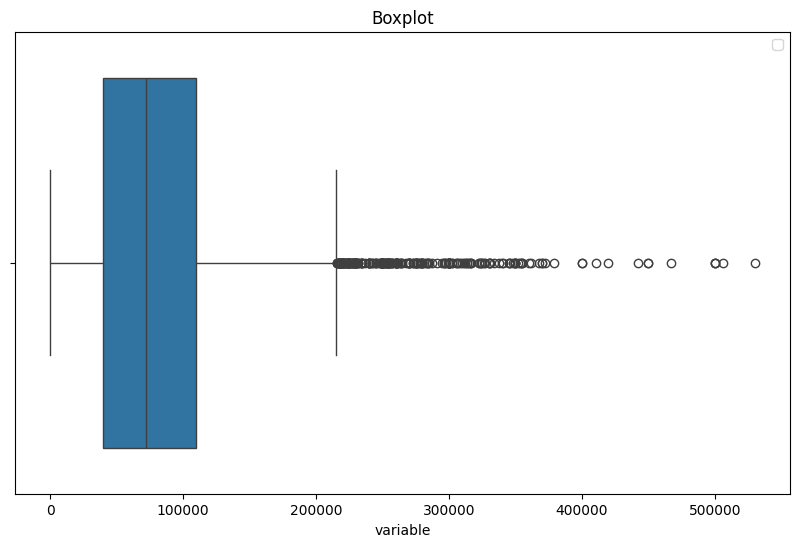

min: 1.0 | max: 530000.0 | mean: 82665.36987607 | median: 72000.0 | sd: 58652.2072 | cv: 70.95 %
motor


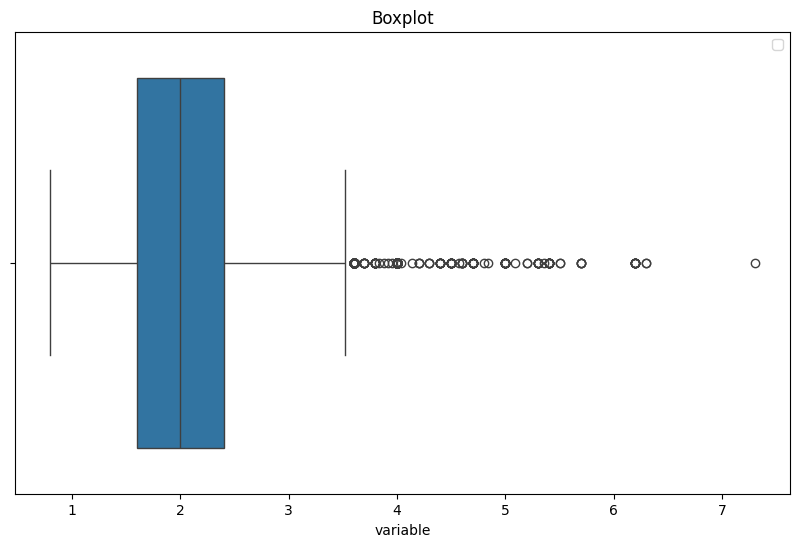

min: 0.8 | max: 7.3 | mean: 2.01796235 | median: 2.0 | sd: 0.728 | cv: 36.07 %


In [3]:
vars_numeric = ["precio", "año", "km", "motor"]
for col in vars_numeric:
    print(col)
    eda.Plot.boxplot(df[col].astype(float).dropna())

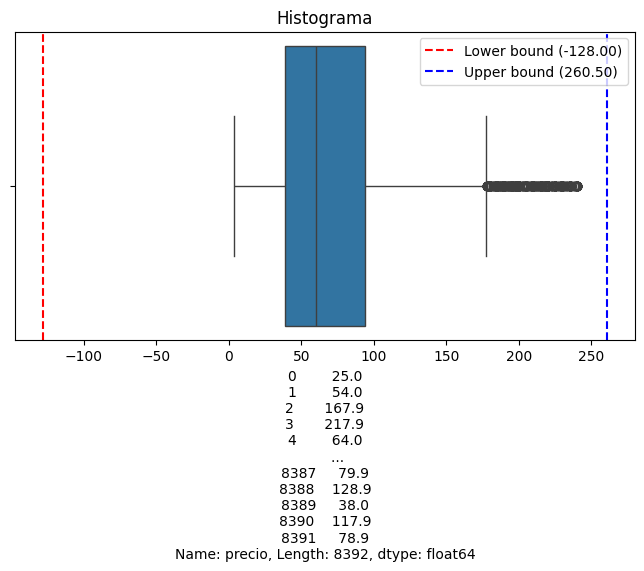

Deviation: 3 + IQR
Total outliers: 0
[]


In [5]:
outliers = eda.Plot.uni_outliers(df["precio"], deviation = "extreme")

In [6]:
vars_categ = ["transmision", "tipo_de_combustible", "tipo_de_carroceria", "puertas", "marca", "marca_modelo",
              "barrio", "ciudad", "departamento", "color"]

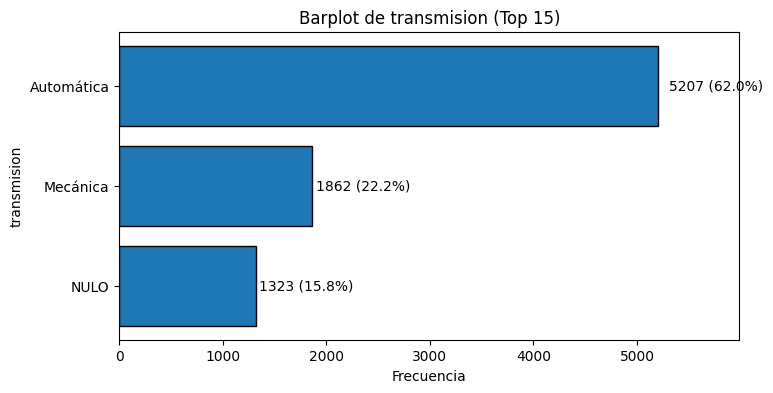

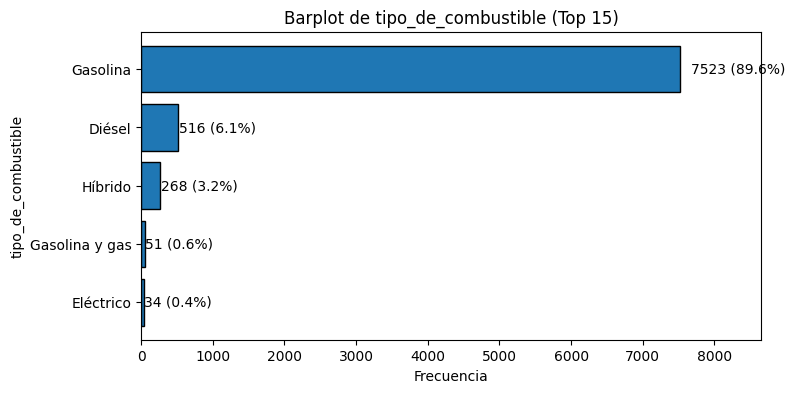

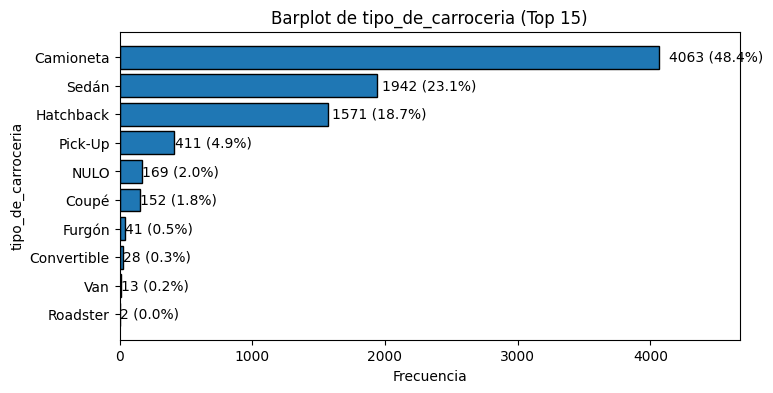

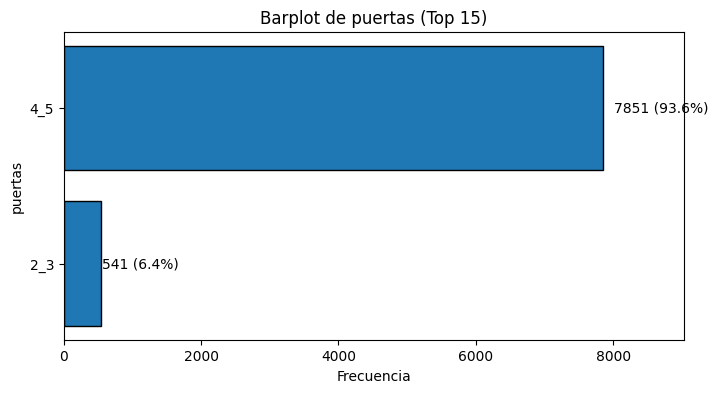

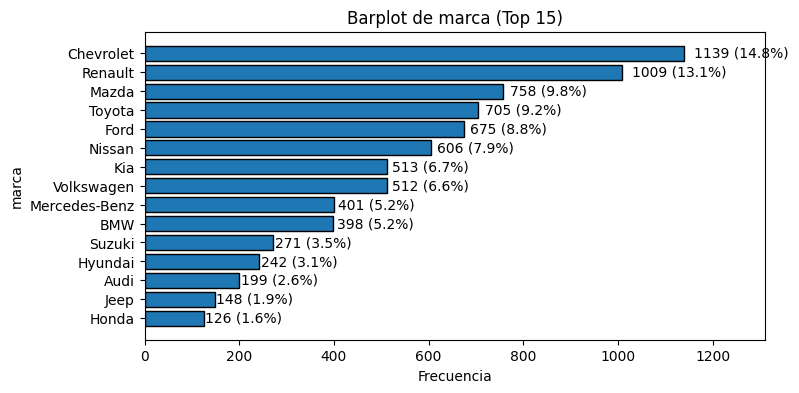

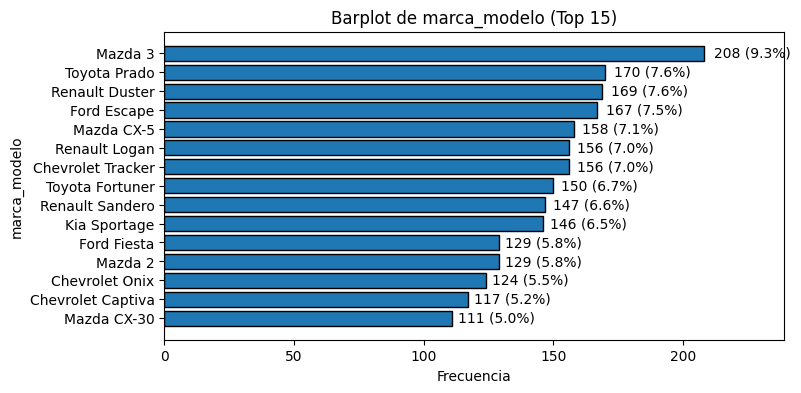

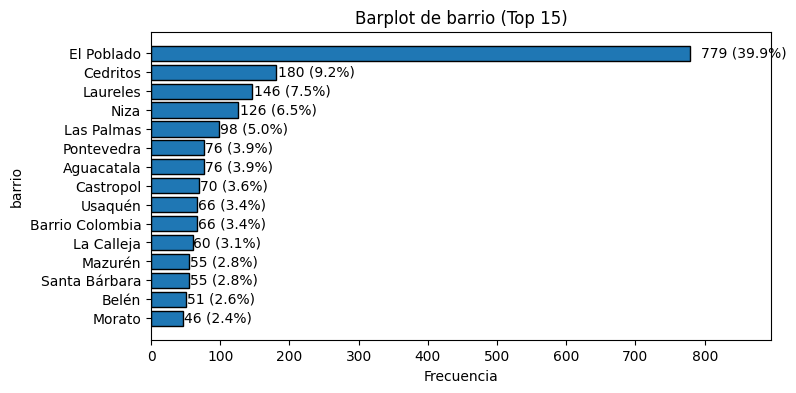

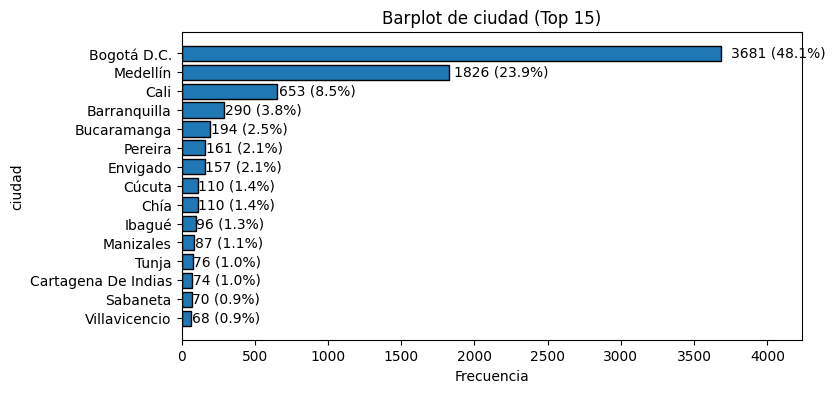

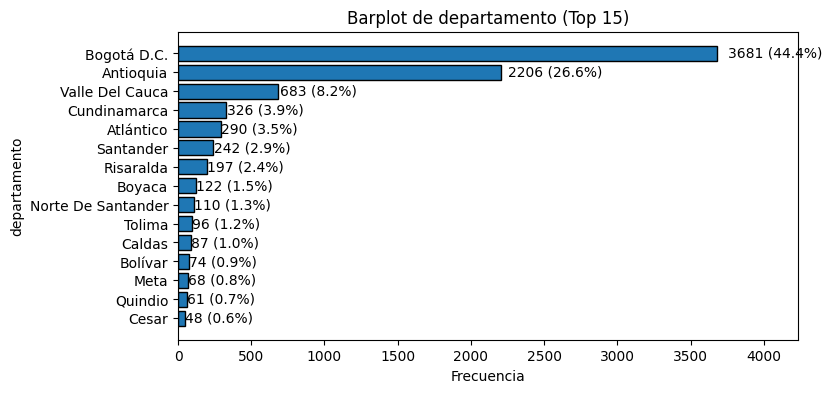

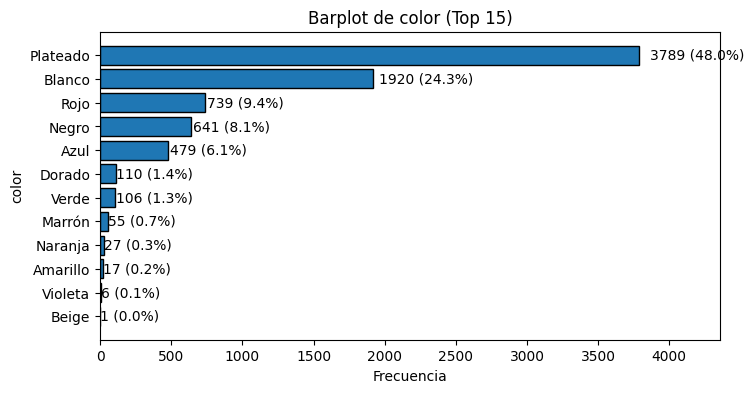

In [7]:
for col in vars_categ:
    eda.Plot.barplot(df, col, horiz= True, top_n=15)

In [ ]:
eda.Plot.plot_serie(df, "año","precio","median")

In [ ]:
for col in vars:
    print(col)
    print(df[col].unique())
    print("-"*120)

In [ ]:
eda.Stats.nulls(df)

In [ ]:
eda.EDA(df).eda()

In [ ]:
ax = df.copy()
ax["cont"] = 1
ax = ax[ax["marca"] == "Chevrolet"]
ax = ax.groupby("ciudad").agg({"cont":"sum", "precio":np.median}).reset_index().sort_values("precio", ascending=False)
ax = ax[ax["cont"] >= 50]
ax

In [ ]:
pip install plotly

## PCA

In [ ]:
df_pca = df[["precio", "año", "km", "motor", "km_por_año", "transmision", "marca", "tipo_de_carroceria"]].dropna()

In [ ]:
pca = eda.PCA(df_pca, vars_numeric=["precio", "año", "km", "motor", "km_por_año"], vars_cat=['transmision', "tipo_de_carroceria"])
pca.variables()

In [ ]:
pca.plot()

In [ ]:
df2 = eda.PCA(df_pca, vars_numeric=["precio", "año", "km", "motor", "km_por_año"], vars_cat=['transmision', "marca_agrup"],
                   clusters = 3, xlim = [-5, 7], ylim = [-4, 6])
df2.plot()

In [ ]:
df2.df_clusters